In [1]:
#Uploading the csv
from google.colab import files
data_to_load = files.upload()


Saving escape_velocity.csv to escape_velocity.csv


The data contains the different temperatures of tungsten and if it's melted at those points or not.
The data has been loaded let's see how it looks on the scatter plot

In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("escape_velocity.csv")

temperature_list = df["Velocity"].tolist()
melted_list = df["Escaped"].tolist()

fig = px.scatter(x=temperature_list, y=melted_list)
fig.show()

plotting the line of regression on the plot. Using the line equation

In [3]:
import numpy as np
temperature_array = np.array(temperature_list)
melted_array = np.array(melted_list)

#Slope and intercept using pre-built function of Numpy
m, c = np.polyfit(temperature_array, melted_array, 1)

y = []
for x in temperature_array:
  y_value = m*x + c
  y.append(y_value)

#plotting the graph
fig = px.scatter(x=temperature_array, y=melted_array)
fig.update_layout(shapes=[
    dict(
      type= 'line',
      y0= min(y), y1= max(y),
      x0= min(temperature_array), x1= max(temperature_array)
    )
])
fig.show()

As we see the line dosen't make sense.
plotting the graph again using the sigmoid function.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



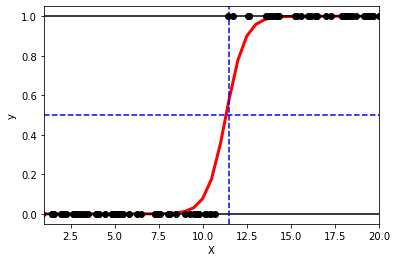

11.5011501150115


In [33]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(temperature_list, (len(temperature_list), 1))
Y = np.reshape(melted_list, (len(melted_list), 1))

lr = LogisticRegression()
lr.fit(X, Y)

plt.figure()
plt.scatter(X.ravel(), Y, color='black', zorder=20)

def model(x):
  return 1 / (1 + np.exp(-x))

#Using the line formula 
X_test = np.linspace(0, 5000, 10000)
melting_chances = model(X_test * lr.coef_ + lr.intercept_).ravel()

plt.plot(X_test, melting_chances, color='red', linewidth=3)
plt.axhline(y=0, color='k', linestyle='-')
plt.axhline(y=1, color='k', linestyle='-')
plt.axhline(y=0.5, color='b', linestyle='--')

#do hit and trial by changing the vlaue of X_test here.
plt.axvline(x=X_test[23], color='b', linestyle='--')

plt.ylabel('y')
plt.xlabel('X')
plt.xlim(1, 20)
plt.show()
print(X_test[23])

using the values of slope and intercept we'll write the program to predict the prediction of wether the rocket can escape at the given velocities.

In [48]:
temp = float(input("Enter the velocity here:- "))
chances = model(temp * lr.coef_ + lr.intercept_).ravel()[0]
print (chances)
if chances <= 0.01:
  print("Rocket cannot escape")
elif chances >= 1:
  print("Rocket can escape")
elif chances < 0.5:
  print("Rocket might not be able to escape")
else:
  print("Rocket might be able to escape")

Enter the velocity here:- 70
1.0
Rocket can escape
